# Data Viz with Matplotlib 1

Welcome. This is the first part of the Data Visualization with Matplotlib Workshop. This is a part 1 of 4. Before starting, let's discuss the structure and objective of the workshop in the general.

## Introduction

### Objective

The workshop will focus on the basics of `matplotlib`, which is the most popular visualization library in Python. After the workshop you will:

1. Understand the basic (object oriented) syntax of `matplotlib`;
2. Be able to create scatterplots and histograms with `matplotlib`;
3. Be able to understand the `matplotlib` documentation and Stackoverflow discussions about more advanced plotting.

### Why `matplotlib`?

Matplotlib is extremely powerful, but also somewhat cumbersome to work with. The great amount of control over each component of the plot comes at the cost of a rather complex syntax and multiple lines of codes to achieve the desired results. For example, in this workshop we will always use at least 2 lines of code to create even the simplest plot. So, why teaching `matplotlib` in an introductory workshop about data visualization in Python? 

Simply put, `matplotlib` is the backend of most data visualization in Python. Lighter/ simpler visualization from packages such as `Pandas`, `Seaborn`, `Geopandas`, `Arviz`, `statsmodel`, `OSMnx` (to cite packages I personally used) uses `matplotlib` as its backend. Chances are that you will eventually need to tweak the standard plots you get out of this packages -- for example, for publication purposes. To do this, you will need to know how `matplotlib` works. Moreover, you can use `maptlotlib` for new kinds of visualization. For example, [I use it to visualize (and create animation from) soccer data](https://github.com/non87/OOPitch/blob/main/examples/Read%20and%20Visualize%20Data.ipynb). That is, learning `matplotlib` really opens the door to advanced-level visualization in Python.


### Structure of the Workshop

The workshop is divided into 5 main parts:

1. Basic Syntax and Objects
2. Introduction to plotting
3. Scatterplots
4. Histograms
5. How to save a plot in a file

Part 1 and 2 are pre-requisites for the remaining parts as they introduce the basic structure of a `matplotlib` plot. Make sure you get through them before proceeding.


<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebooks, this kind of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

## Part 1: Basic Syntax

Let us start with importing some useful packages. We will be working with three packages: **numpy** , **pandas** and **matplotlib**. The main focus will be on matplotlib and data visualization, but numpy and pandas are great packages to handle data.

### The Backend

Let us start with importing. Here we immediately encounter our first difficulty: this is a notebook. Matplotlib has some peculiar behaviour inside notebooks. It is time to introduce the idea of _backend_ and how matplotlib manages its _backend_ differently inside a notebook. Unfortunately, we have to discuss this before importing matplotlib, because this has to be set immediately.

Quoting from the <a href=https://matplotlib.org/faq/usage_faq.html#what-is-a-backend>matplotlib official documentation</a>:


>The “frontend” is the user facing code, i.e., the plotting code, whereas the “backend” does all the hard work behind-the-scenes to make the figure. There are two types of backends: user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as “interactive backends”) and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as “non-interactive backends”).


In other words, a backend transforms code into a figure. There are different options to do this, with the main difference being between the hard and the interactive modes. Indeed, a backend will either save the final product on a file ( _hard backend_ ), such as a png file, or show you the plot on screen ( _interactive backend_ ). 

Matplotlib is smart and will select a working backend for you most of the time. Therefore, you will hardly ever notice -- especially if you just want to save a figure in an external file. However, it is important we check how backends work because the code you write and the behavior of matplotlib will change implictly depending on how you are running your code (notebook, live coding, or script). To write code that reliably produces the results you want, knowing the basics of matplotlib backends is fundamental. For example, how do we translate notebook code to script code?

This is a list of the backends available in my machine within this Conda environment -- your list may differ. Notice, we have not even imported `matplotlib` yet.

In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


We will mostly use the non-interactive `inline` backend, which is specific to a notebook environment. In the last workshop, we will also focus on using interactive backends in a non-notebook environment. The `inline` backend will show the figures just below the cell where they are created. The basic rule you have to follow when plotting in notebooks:  **One cell, one plot**. Depending on your coding style this may or may not be a big deal. 

To use this backend, we will use a <a href="https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained">magic function</a> of Ipython (official name!). In general, you can recognize a magic function because it is preceded by `%` -- the line above was a magic function already. However, magic functions will only work in a notebook -- use the function `matplotlib.use()` to change backend outside notebooks.

In [2]:
%matplotlib inline

Now it is time to import `matplotlib` and other helpful libraries. Actually, we will not even import the entirety of `matplotlib`: we will use a sub-module named `pyplot` , which collects high-end function for plotting. This submodule is most often imported under the alias of `plt`.

Alongside `plt`, we will import `pandas` (as `pd`) and `numpy` (as `np`) for managing data. This workshop does not require a deep knowledge of these packages, but they will make our life easier and we will use them from time to time.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Just for safety, check backend
print(f"This is the backend: {plt.get_backend()}")

This is the backend: module://ipykernel.pylab.backend_inline


Finally, purely as a placeholder, we will create some meaningless data that we will store in a `np.array`.

In [4]:
x_dt = [1,2,3,4]
y_dt = [4,2,3,1]

### The Fundamental Line

We will be using the _Object Oriented_ interface to `matplotlib`. In the _Object Oriented_ interface, the simplest way to obtain an empty plot (which we will fill up in a second) is to use what I name the _fundamental line_.

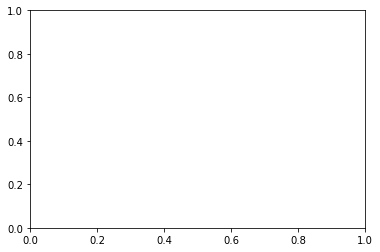

In [5]:
# The fundamental line
fig, ax = plt.subplots()

The variables `fig` and `ax` now contain two objects, a `Figure` and an `Axes`. The two objects were created through a call to the _fundamental line_. The `inline` backend showed us the (empty) figure we just created in the previous cell. We will soon discuss what a `Figure` and an `Axes` are. For the moment, let me point out that to populate our empty plot with some data, we will call a _method_ of the `Axes` object. For example, to visualize our simple dataset

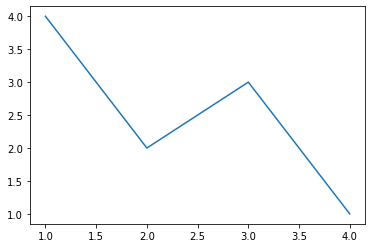

In [6]:
# The plot() method of the object Axes
ax.plot(x_dt, y_dt)
# We need to call fig to see the figure again in this cell
fig

So the basic workflow for the Object Oriented interface is:

1. Create a `Figure` and an `Axes` through the _fundamental line_ (more advanced alternatives exist)
2. Populate the plot with data by calling methods of the `Axes` object(s)

This workflow is in contrast to the _functional_ workflow, where the same result as above can be obtained in one line by calling a function from the `plt` submodule.

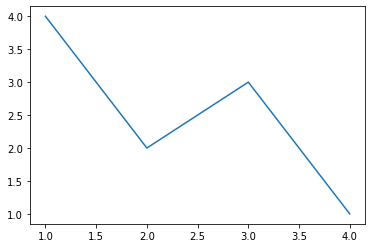

In [7]:
# Functional interface
plt.plot(x_dt, y_dt)

#### More than 1 Axes
 
The most important thing to know about the `Figure` and `Axes` object is the following (from the [official documentation](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html)):

> 1. The Figure is the final image that may contain 1 or more Axes.
> 2. The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

In fact, the _fundamental line_ allows us to create a grid of `Axes` within the same `Figure`:

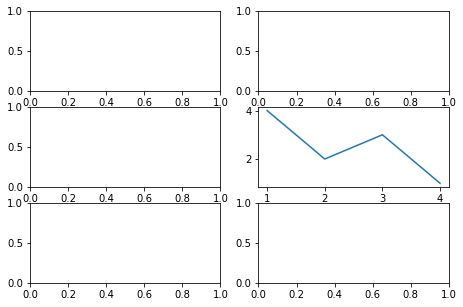

In [12]:
# Create a 3x2 grid
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7.5, 5))
# populate the second row, second column plot
ax[1,1].plot(x_dt, y_dt)

Even the simple `plt.subplots()` have many parameters to tweak. In the next cell, I modify the relative width and height of the `Axes` to produce a grid that is not regular.

<div class="alert alert-block alert-success">
    <b>More control over Axes positions</b>: The dispositon of Axes within a Figure is very flexible. Matplotlib has different function for the creation of Axes with different sizes and different position inside the Figure. We saw plt.subplots() to create a regular grid of Axes. Other relevant functions are add_subplot(),  <a href="https://matplotlib.org/3.3.0/gallery/userdemo/demo_gridspec01.html#sphx-glr-gallery-userdemo-demo-gridspec01-py">subplot2grid()</a>. <a href="https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html">gridspec()</a> and the sub-module <a href="https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html">AxesGrid</a>
</div>

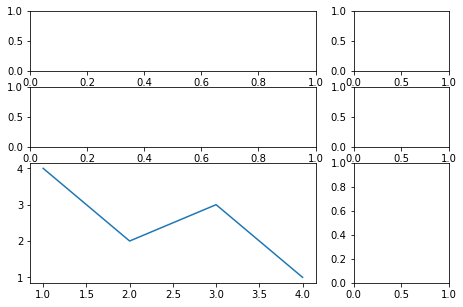

In [13]:
fig, ax =plt.subplots(nrows=3, ncols=2, figsize=(7.5, 5), 
                      # This line change the width ratio of the columns and the height ratio of the rows
                      gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,1,2]})
ax[2,0].plot(x_dt, y_dt)

##### Exercise 1

Create a grid of 2 rows and 3 columns, with a figure size of 10 (height) and 15 (width). Plot `x_dt` and `y_dt` in the second row, second column.

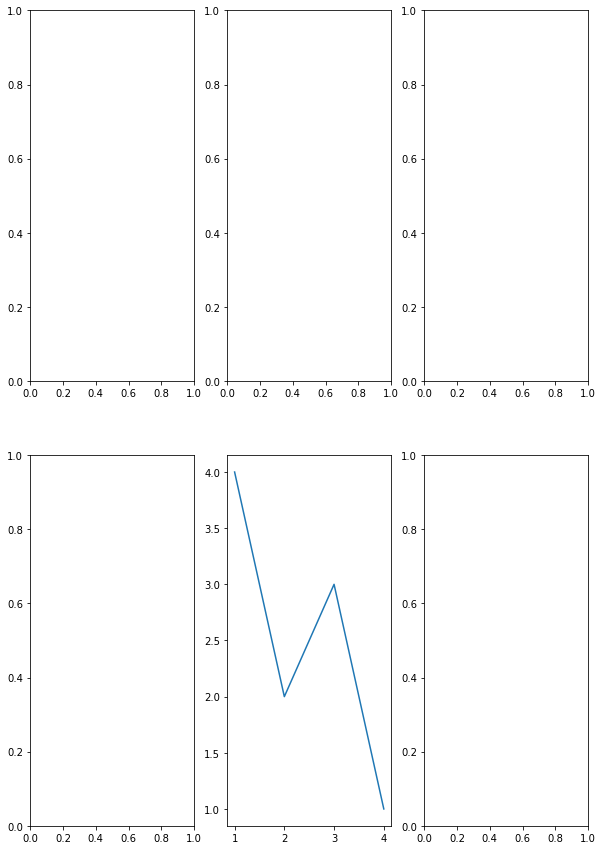

In [14]:
# The fundamental line (with arguments)
fig, ax =plt.subplots(nrows=2, ncols=3, figsize=(10, 15))
# Plot in the second row, second column
ax[1,1].plot(x_dt, y_dt)

**Extra** Can you make the `Axes` where you plotted the data 2 times taller and 3 times wider than the `Axes` belonging to the other columns/rows?

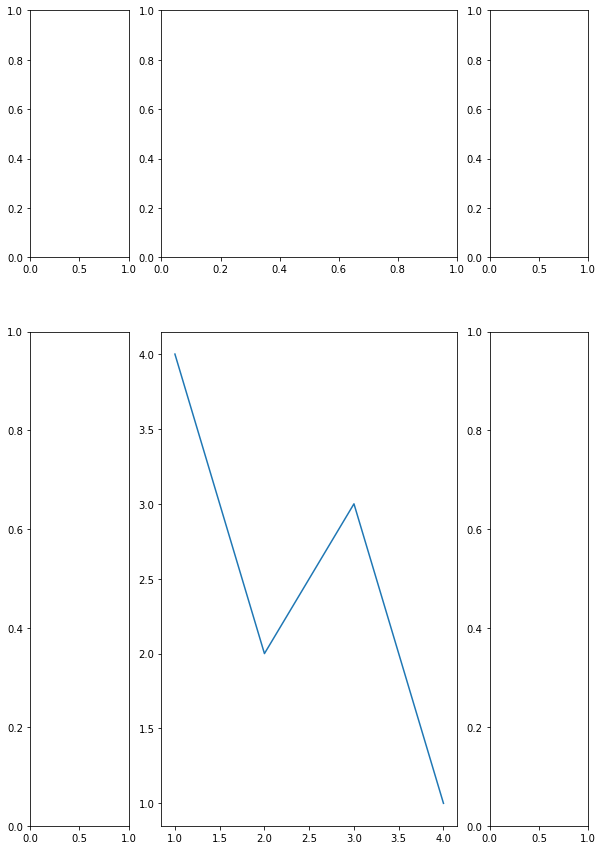

In [15]:
# The fundamental line (with new arguments)
fig, ax =plt.subplots(nrows=2, ncols=3, figsize=(10, 15),
                      # This line change the width ratio of the columns and the height ratio of the rows
                      gridspec_kw={'width_ratios': [1, 3, 1], 'height_ratios': [1,2]})
# Same plot as above
ax[1,1].plot(x_dt, y_dt) 

### Anatomy of a Figure

So far, we have focused on one or more `Axes` in one `Figure`, but what's inside an `Axes`? How can we change its appearance? `Matplotlib` provides the user with a very high level of control on the plot. This figure, once again from the matplotlib official documentation, shows the main elements in each `Axes`.

![anatomy.png](https://matplotlib.org/_images/anatomy.png)

Please notice that ***Axis and Axes*** are different -- in fact, an `Axes` contain four `axis`.

All of these elements are stored within each `Axes`, we can see it using the function `artist.getp()` from the `matplotlib` library (as opposed to the sub-module `plt`), which we import

In [16]:
import matplotlib

matplotlib.artist.getp(ax[0,0])

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.spines.Spine object at 0x7f972d76d640...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_ratio = 1.0
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x7f972d76d640...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(720x1080)
    frame_on = True
    geometry = (2, 3, 1)
    gid = None
    gridspec = GridSpec(2, 3, height_ratios=[1, 2], width_ratios=...
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 0 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.1

To change any of the `Axes` elements, we call "setter" methods of the `Axes` we want to change. That is, these methods modify the internal parameter of the `Axes` and most of their names start with `set_`. As a side note, even the official documentation admits that having "setter" methods is not great coding -- python has better ways to do this. Perhaps the syntax will change slightly in the future. But it will do for now. Let's see the most common settings for our `Axes`.

Let me point out that you don't have to memorize all of these methods. Using `matplotlib` in your everyday work, you will naturally memorize the most useful setter methods (for example, `ax.set_title()`), but it is totally common to check online the ones you rarely use.

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = False
    autoscalex_on = False
    autoscaley_on = False
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.spines.Spine object at 0x7f972d55aa30...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_ratio = 0.2
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x7f972d55aa30...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(432x288)
    frame_on = True
    geometry = (1, 1, 1)
    gid = None
    gridspec = GridSpec(1, 1)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 0 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)
    ra

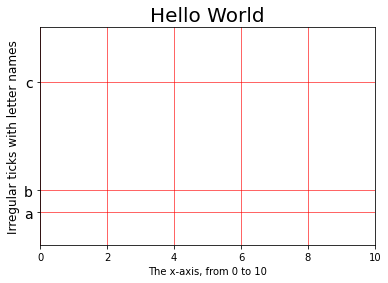

In [17]:
fig, ax = plt.subplots()

# Change the title
ax.set_title("Hello World", fontsize=20)
# Change the x-axis
ax.set_xlim([0,10])
ax.set_xlabel("The x-axis, from 0 to 10")
# Set the yticks as well. A little more complex
ax.set_ylim([-1,1])
ax.set_yticks([-.7, -.5, .5])
ax.set_yticklabels(["a", 'b', 'c'], fontsize=14)
ax.set_ylabel("Irregular ticks with letter names", fontsize = 12)
# Show the grid
ax.grid(color='red', linewidth=0.6)
# Compare the attributes of ax with the attributes we printed above
print(matplotlib.artist.getp(ax))

##### Exercise 2

Create a `Figure` containing one `Axes` with the _fundamental line_. Plot `x_dt` and `y_dt` in the `Axes`. Change the `xlim` so that it spans from 2 to 3.5. Change the title of the `Axes` to "Zoom in".

In [ ]:
# The fundamental line

# Plot

# Change title

# Change x range


**Extra** Create a regular grid of `Axes`, with two rows and one column. In the top `Axes` replicate the same "Zoom in" plot you have just created. In the bottom `Axes` plot the same data (`x_dt` and `y_dt`). Change the bottom title to `Zoom out` and its `x_lim` to `[-1, 5]`. 
If the two `Axes` appear too close, play around with the `hspace` parameter when you use the _fundamental line_. You can specify the `hspace` parameter through the `gridspec_kw` dictionary, as we did above.

In [ ]:
# The fundamental line with arguments

# plot in the top Axes

# Change top title

# change top x range

# Plot in the bottom Axes

# change bottom title

# change bottom x range
